# <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Cohort Analysis for Customer Retention in E-Commerce</div></b>

## Introduction
 
Cohort analysis is a powerful analytical technique that involves dividing users into distinct groups, or **cohorts**, based on shared characteristics or experiences, such as their acquisition date. This method allows businesses to track customer behavior, engagement, and retention over time.

For example, an e-commerce platform may define cohorts based on the month users first signed up. By monitoring how each cohort interacts with the platform over time, businesses can gain valuable insights into customer retention, conversion rates, and lifetime value.

#### Importance of Cohort Analysis
Cohort analysis is essential for understanding customer retention patterns and making data-driven business decisions. Key benefits include:  

- **Identifying retention trends**: Tracks how different customer groups retain over time.  
- **Detecting churn patterns**: Pinpoints when and why customers stop engaging.  
- **Evaluating marketing efforts**: Measures the effectiveness of customer acquisition strategies.  
- **Optimizing business strategies**: Helps refine marketing, product development, and customer support initiatives.

#### Retention Rate Time-Based Cohort Analysis
This specialized approach to cohort analysis focuses on **user retention across different time periods** by:  

1. Creating cohorts based on user acquisition dates.  
2. Measuring the percentage of users from each cohort who remain engaged over time (e.g., after 1 month, 3 months, etc.).  
3. Analyzing how retention rates vary across different cohorts and identifying patterns that impact long-term customer engagement.

#### Business Problem
**E-Shop Pro**, a growing e-commerce company, faces a critical challenge: declining customer retention rates. While the company has successfully acquired new customers through aggressive marketing, it struggles to keep them engaged long-term.  

Despite collecting large volumes of customer data, **E-Shop Pro has not effectively leveraged analytics to understand customer behavior and retention patterns**. This represents a missed opportunity for improving customer loyalty and lifetime value.

#### Research Question
How can cohort analysis help **E-Shop Pro** understand and improve customer retention?

#### Objectives  
The primary goal of this project is to conduct a **time-based cohort analysis** to assess customer retention. Specific objectives include:

1. **Retention Rate Analysis**: Calculate and analyze retention rates for different customer cohorts over time.  
2. **Cohort Segmentation**: Group customers into distinct cohorts based on acquisition date or first purchase.  
3. **Identify Retention Trends**: Detect behavioral patterns that influence customer retention.  
4. **Churn Analysis**: Determine when and why customers disengage from the platform.  
5. **Recommendation Strategies**: Develop data-driven strategies to improve customer retention.

#### Import libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### Load and prepare dataset

In [2]:
# Loading the dataset
data = pd.read_csv("e_commerce_data.csv", encoding='latin-1')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Data Description

1. **InvoiceNo**: A unique identifier for each invoice or transaction, often used for tracking and reference purposes.

2. **StockCode**: A code or identifier associated with a specific product or item in the e-commerce store's inventory, used for cataloging and tracking purposes.

3. **Description**: A categorical feature that provides a brief textual description of the product or item being sold, offering clarity to customers about what they are purchasing.

4. **Quantity**: The quantity or number of units of a product that were included in the transaction, indicating the purchase volume for each item.

5. **InvoiceDate**: The date and time when the transaction or invoice was generated, offering insights into when purchases were made and allowing for temporal analysis.

6. **UnitPrice**: Indicating the total cost of the items purchased.

7. **CustomerID**: A unique identifier associated with each customer or shopper, allowing for customer-specific analysis and tracking of individual purchasing behavior.

8. **Country**: The name of the country where the customer is located or where the transaction occurred.

This data description provides an overview of the key data elements available in the dataset, which can be used to conduct the retention rate time-based cohort analysis mentioned in the project objectives.

### Data Cleaning & Processing

In [3]:
# view info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Initial Observations:**
- Dataset Size: 541,909 rows and 8 columns.
- Missing Data: The CustomerID column has missing values (only 406,829 non-null values).

**Data Types:**
- InvoiceDate is currently an object and should be converted to a datetime format.
- CustomerID is a float, but it should likely be an integer or categorical ID.

Next, I'll clean and preprocess the data by:

- Converting InvoiceDate to datetime format.
- Handling missing values in CustomerID.
- Checking for negative values in Quantity (possible returns).
- Identifying duplicate or anomalous transactions.

In [4]:
# Summary statistics for numerical columns
summary_stats = data.describe()

summary_stats

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Observations Based on the Summary Statistics**  

1. **Quantity Distribution Issues**:  
   - The **minimum quantity is -80,995**, indicating a high number of returns or incorrect data entries.  
   - The **maximum quantity is 80,995**, suggesting some very large purchases.  
   - The **mean quantity is 12.06**, but the **standard deviation is 248.69**, indicating a highly skewed distribution with extreme values.  

2. **Invoice Date Range**:  
   - The dataset spans from **2010-12-01 to 2011-12-09**, covering approximately one year.  
   - The presence of timestamp values suggests transaction-level data.  

3. **Unit Price Anomalies**:  
   - The **minimum unit price is 0.00**, which could indicate promotional or free items, missing data, or incorrect entries.  
   - The **maximum unit price is 38,970**, which is significantly higher than the 75th percentile (3.75), suggesting outliers or luxury/high-value items.  
   - The **mean unit price is 3.46**, which is relatively low, but the **standard deviation is 69.31**, reinforcing the presence of extreme values.  

4. **CustomerID Analysis**:  
   - The **CustomerID ranges from 12,346 to 18,287**, implying a unique customer identifier.  
   - The **mean CustomerID is 15,287**, and the **standard deviation is 1,713**, suggesting an even distribution of customers.  

In [5]:
# Checking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are missing data points in Description and CustomerID. We will drop the rows containing these data points

In [6]:
# Count total number of duplicate rows
num_duplicates = data.duplicated().sum()
print("Total duplicate rows:", num_duplicates)

# Display duplicate rows
df_duplicates = data[data.duplicated()]
print("Duplicate rows:")
print(df_duplicates)

# View duplicates based on a specific column (e.g., 'CustomerID')
df_customer_duplicates = data[data.duplicated(subset=['CustomerID'], keep=False)]
print("Duplicate rows based on 'CustomerID':")
print(df_customer_duplicates)


Total duplicate rows: 5268
Duplicate rows:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         C

In [7]:
# Convert InvoiceDate to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Drop rows where CustomerID is missing (since retention analysis requires customer tracking)
data.dropna(inplace = True)

# Checking for negative values in Quantity (indicating returns)
negative_quantity = data[data["Quantity"] < 0]

# Checking for duplicate rows
duplicates = data.duplicated().sum()

# Display summary of detected issues
negative_quantity.shape[0], duplicates

(8905, 5225)

In [8]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Remove negative quantity rows (handling product returns separately if needed)
data_cleaned = data_cleaned[data_cleaned["Quantity"] >= 0]

# Verify changes
num_duplicates = data_cleaned.duplicated().sum()
negative_quantity_after = data_cleaned[data_cleaned["Quantity"] < 0].shape[0]

num_duplicates, negative_quantity_after, data_cleaned.shape

(0, 0, (392732, 8))

In [9]:
# Save the cleaned data to a CSV file
data_cleaned.to_csv("data_cleaned.csv", index=False)

**Data Cleaning Summary:**

- Date Conversion: InvoiceDate successfully converted to datetime.
- CustomerID and Description Handling: Rows with missing data points in these two columns were removed.
- Negative Quantity: 8,905 rows have negative quantity (indicating product returns). We removed negative quantities since returns do not contribute to retention.
- Duplicate Rows: 5,225 duplicate rows found and removed.

Next, I'll proceed with exploratory data analysis (EDA), including summary statistics and visualizations. ​

### Exploratory Data Analysis (EDA

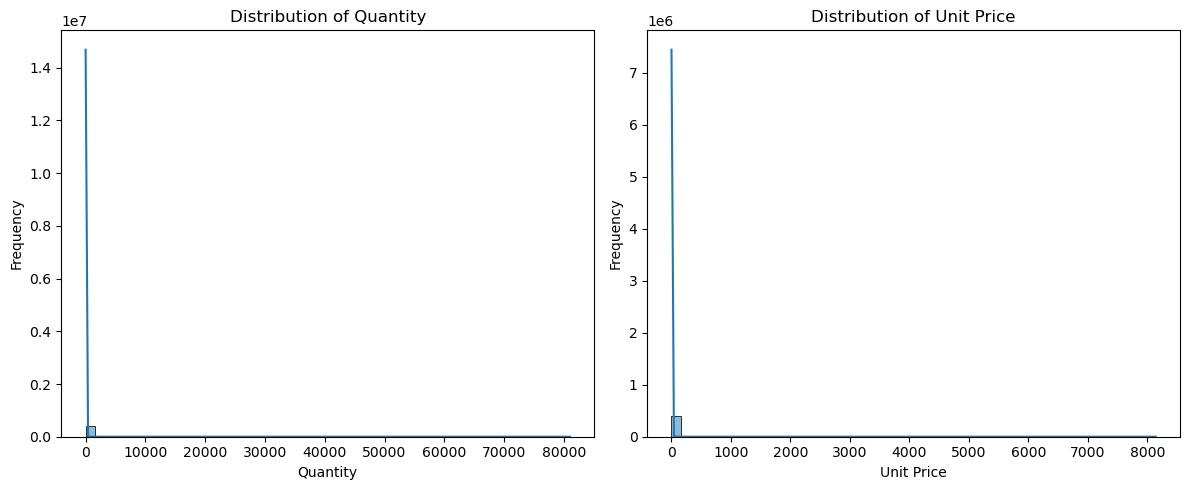

In [10]:
# Create a figure with two subplots for Quantity and Unit Price distributions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the distribution of Quantity
sns.histplot(data=data_cleaned["Quantity"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Quantity")
axes[0].set_xlabel("Quantity")
axes[0].set_ylabel("Frequency")

# Plot the distribution of Unit Price
sns.histplot(data=data_cleaned["UnitPrice"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Unit Price")
axes[1].set_xlabel("Unit Price")
axes[1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

#### Observation

1. **Quantity Distribution:**  
   - The majority of purchases involve relatively small quantities.
   - The distribution is slightly right-skewed, meaning some transactions have significantly higher quantities.

2. **Unit Price Distribution:**  
   - Unit prices range from **1 to 100**, with most products priced on the lower end.
   - There is a peak around the lower price range, indicating that most products are affordable.

- #### Analysis of Countries by Number of Purchases

In [12]:
data_cleaned.sample(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
362471,568491,22728,ALARM CLOCK BAKELIKE PINK,2,2011-09-27 11:58:00,3.75,15443.0,United Kingdom
321231,565141,22869,NUMBER TILE COTTAGE GARDEN 1,2,2011-09-01 13:40:00,1.95,17841.0,United Kingdom
270189,560552,82613D,METAL SIGN CUPCAKE SINGLE HOOK,2,2011-07-19 12:54:00,1.25,15311.0,United Kingdom
257053,559509,22979,PANTRY WASHING UP BRUSH,1,2011-07-08 15:25:00,1.45,15920.0,United Kingdom


In [13]:
# Grouping by country and summing the quantity sold
quantity_by_country = data_cleaned.groupby("Country")["Quantity"].sum().reset_index()

# Sorting the countries by total quantity in descending order
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending=False)

# Displaying the top 3 countries by quantity sold
quantity_by_country.head()

,Country,Quantity
35,United Kingdom,4254037
23,Netherlands,200937
10,EIRE,140383
14,Germany,119156
13,France,111429


In [14]:
# Analyzing Top and Bottom Countries by Customer Activity and Purchase Behavior

# 1. Top 10 Countries by Number of Unique Customers
top_countries_customers = (
    data_cleaned.dropna(subset=['CustomerID'])
    .groupby('Country')['CustomerID']
    .nunique()
    .nlargest(10)
)

# 2. Top 10 Countries by Number of Purchases (Unique Invoices)
purchases_by_country = (
    data_cleaned.groupby('Country')['InvoiceNo']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

# 3. Top 10 Countries by Total Quantity Purchased
top_quantity_countries = (
    data_cleaned.groupby("Country")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# 4. 10 Countries with the Least Number of Quantity Purchased
least_quantity_countries = (
    data_cleaned.groupby('Country')['Quantity']
    .sum()
    .nsmallest(10)
)

# Display results
top_countries_customers, purchases_by_country, top_quantity_countries, least_quantity_countries

(Country
 United Kingdom    3921
 Germany             94
 France              87
 Spain               30
 Belgium             25
 Switzerland         21
 Portugal            19
 Italy               14
 Finland             12
 Austria             11
 Name: CustomerID, dtype: int64,
 Country
 United Kingdom    16649
 Germany             457
 France              389
 EIRE                260
 Belgium              98
 Netherlands          95
 Spain                90
 Australia            57
 Portugal             57
 Switzerland          51
 Name: InvoiceNo, dtype: int64,
 Country
 United Kingdom    4254037
 Netherlands        200937
 EIRE               140383
 Germany            119156
 France             111429
 Australia           84199
 Sweden              36078
 Switzerland         30083
 Spain               27944
 Japan               26016
 Name: Quantity, dtype: int64,
 Country
 Saudi Arabia             80
 Bahrain                 260
 RSA                     352
 Brazil              

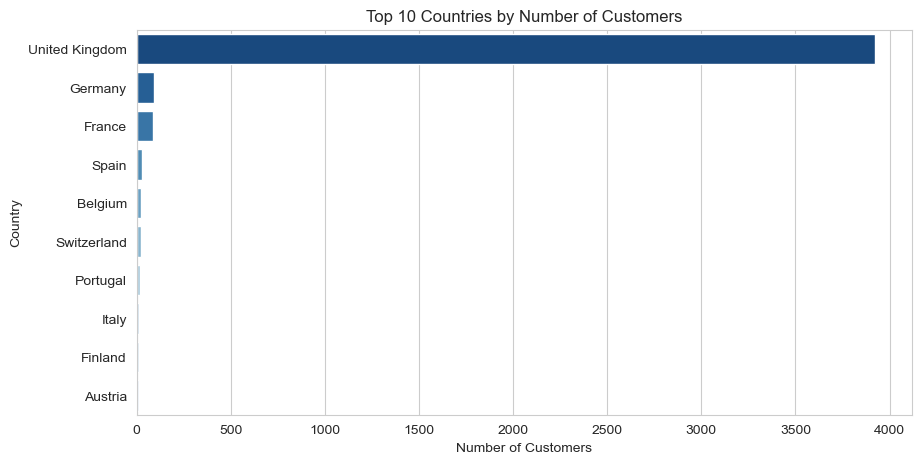

In [15]:
# 1. Top 10 Countries by Number of Customers

# Set visual style
sns.set_style("whitegrid")

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_countries_customers.values, 
    y=top_countries_customers.index, 
    palette="Blues_r"
)

# Labels and title
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.title("Top 10 Countries by Number of Customers")

# Show plot
plt.show()

1. **United Kingdom Dominance:**  
   - The **United Kingdom** has the **highest number of customers** by a significant margin compared to other countries.  
   - This suggests that the majority of E-Shop Pro’s customer base is concentrated in the UK.

2. **Huge Drop-Off After the UK:**  
   - The number of customers in **Germany, France, and Spain** is significantly lower than in the UK.  
   - The gap suggests that international market penetration is relatively weak.

3. **Minor Contributions from Other Countries:**  
   - Belgium, Switzerland, Portugal, Italy, Finland, and Austria contribute only a **small fraction** of total customers.  
   - This could indicate **low brand awareness or engagement** in these regions.

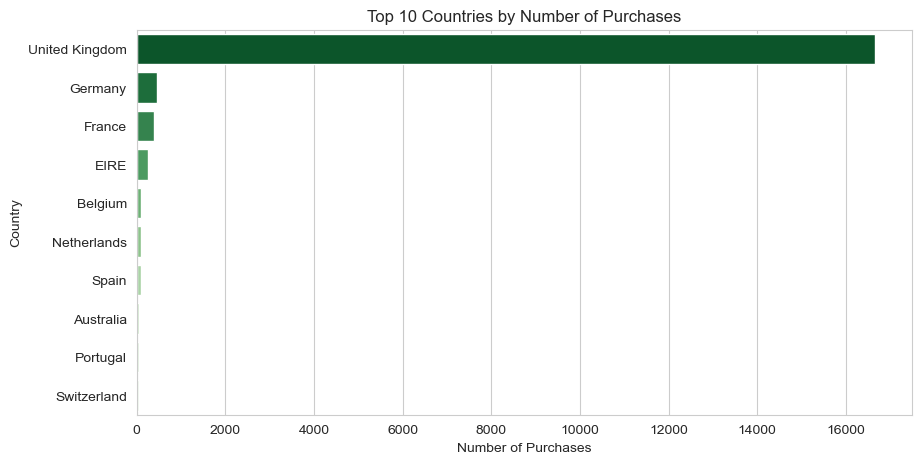

In [16]:
# 2. Top 10 Countries by Number of Purchases

plt.figure(figsize=(10, 5))
sns.barplot(
    x=purchases_by_country.head(10).values, 
    y=purchases_by_country.head(10).index, 
    palette="Greens_r"
)

# Labels and title
plt.xlabel("Number of Purchases")
plt.ylabel("Country")
plt.title("Top 10 Countries by Number of Purchases")

# Show plot
plt.show()


1. **United Kingdom Dominates Purchases:**  
   - The UK has by far the **highest number of purchases**, significantly more than any other country.  
   - This aligns with the earlier finding that the UK has the most customers, reinforcing that it is the primary market.

2. **Germany and France Follow, but with a Huge Gap:**  
   - Germany and France are the second and third highest in purchases, but their numbers are **only a fraction** of the UK’s.  
   - This suggests a **concentration of sales activity** within the UK, with much lower engagement internationally.

3. **Other Countries Have Minimal Purchases:**  
   - EIRE (Ireland), Belgium, Netherlands, Spain, Australia, Portugal, and Switzerland contribute very little to total purchases.  
   - This could indicate:
     - **Limited market penetration** in these regions.  
     - **Shipping or pricing barriers** affecting customer engagement.  
     - **Potential for growth** if targeted marketing or operational improvements are made.

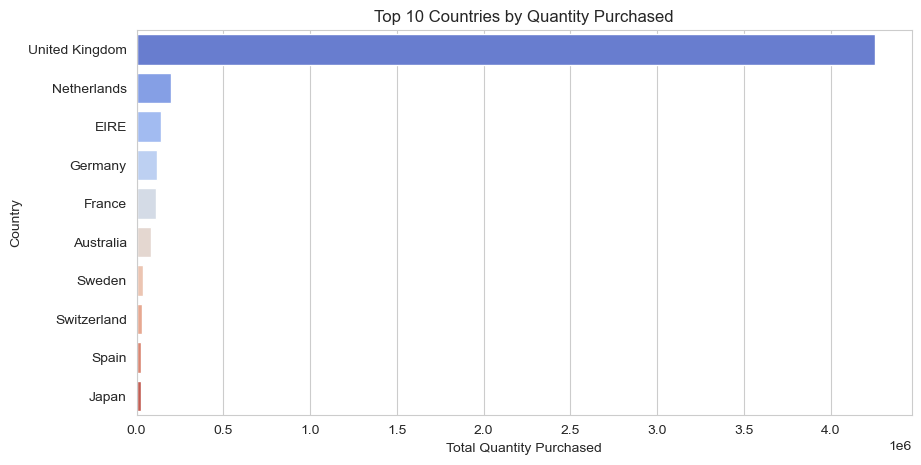

In [17]:
# 3. Top 10 Countries by Quantity Purchased

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_quantity_countries.values, 
    y=top_quantity_countries.index, 
    palette="coolwarm"
)

# Labels and title
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Country")
plt.title("Top 10 Countries by Quantity Purchased")

# Show plot
plt.show()


1. **United Kingdom Dominates**  
   - The **UK has an overwhelmingly higher total quantity purchased** compared to other countries.  
   - This suggests that the UK is the **primary market** for E-Shop Pro.  

2. **Other Countries Have Minimal Purchases**  
   - **Netherlands, EIRE, Germany, France, and Australia** have significantly smaller total quantities purchased.  
   - Their purchases are **not even close** to the UK’s level, indicating lower engagement or market presence.  

3. **Very Low Engagement in the Bottom Countries**  
   - **Sweden, Switzerland, Spain, and Japan** show **very low** total quantities purchased.  
   - E-Shop Pro might need to assess **why these markets underperform** (e.g., shipping issues, lack of localized marketing, pricing concerns).  

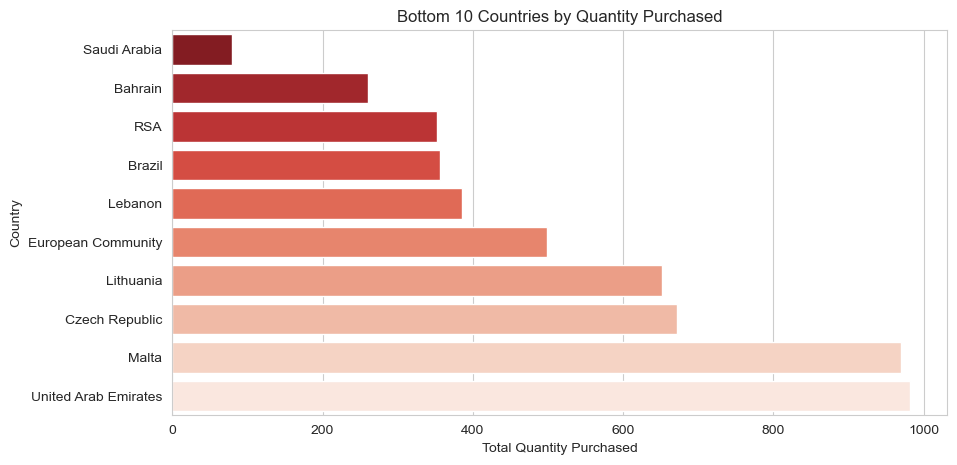

In [18]:
 # 4. Bottom 10 Countries by Quantity Purchased

plt.figure(figsize=(10, 5))
sns.barplot(
    x=least_quantity_countries.values, 
    y=least_quantity_countries.index, 
    palette="Reds_r"
)

# Labels and title
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Country")
plt.title("Bottom 10 Countries by Quantity Purchased")

# Show plot
plt.show()

1. **Countries with the Lowest Purchase Quantities:**  
   - The chart highlights the **bottom 10 countries** in terms of total quantity purchased.  
   - **Saudi Arabia has the lowest quantity purchased**, followed by Bahrain and RSA (Republic of South Africa).

2. **Variation in Low Purchase Volumes:**  
   - While all these countries have low purchase quantities compared to top-performing countries, **United Arab Emirates and Malta have relatively higher purchases** within this group.  
   - The difference in purchase volume between the **highest (UAE) and lowest (Saudi Arabia) is significant**, indicating varying levels of market penetration.

3. **Potential Factors for Low Sales in These Countries:**  
   - **Market demand differences** – Certain products may not appeal to these regions.  
   - **Logistics & shipping barriers** – Higher shipping costs or longer delivery times may discourage purchases.  
   - **Economic or regulatory restrictions** – Some countries may have **import duties, taxes, or legal restrictions** affecting purchase behavior.  
   - **Lack of marketing presence** – Lower awareness of the brand or products in these regions.

- #### Analysis of the Sales Trend

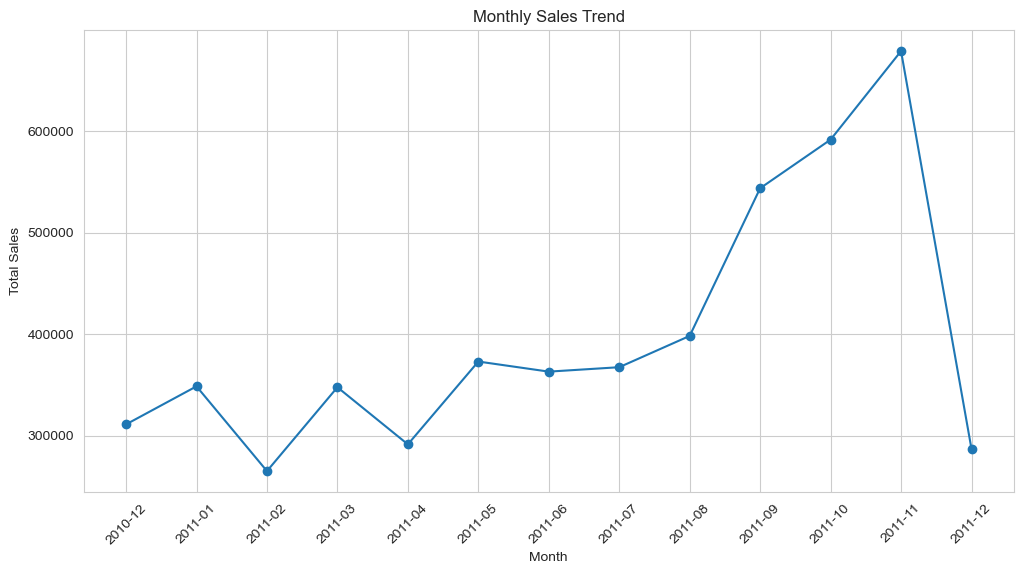

In [19]:
# Group the data by month and calculate the total monthly sales
monthly_sales = data_cleaned.groupby(data_cleaned['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

# Convert the index to string format for plotting
monthly_sales_index = monthly_sales.index.strftime('%Y-%m')

# Create a line chart for monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_index, monthly_sales.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


1. **Significant Fluctuations**: The monthly sales show significant fluctuations over the time period displayed, with large spikes and drops in sales volume.

2. **Highest Sales in 2011-09**: The highest sales volume occurred in September 2011, reaching over 570,000 total sales.

3. **Lowest Sales in 2011-12**: The lowest sales volume was in December 2011, dropping down to around 310,000 total sales.

4. **General Upward Trend**: Despite the fluctuations, there appears to be a general upward trend in sales over the time period shown, with the sales volume increasing from around 340,000 in 2010-12 to over 500,000 by 2011-09.

5. **Seasonal Patterns**: The data suggests potential seasonal patterns, with higher sales volumes in certain months (e.g. September) and lower sales in others (e.g. December).

In summary, the monthly sales trend exhibits significant volatility, but with an overall upward trajectory and potential seasonal influences impacting the sales volume over time.

In [22]:
monthly_sales

InvoiceDate
2010-12    311063
2011-01    348522
2011-02    265043
2011-03    347623
2011-04    291369
2011-05    372948
2011-06    363014
2011-07    367372
2011-08    398190
2011-09    543654
2011-10    591551
2011-11    678760
2011-12    286777
Freq: M, Name: Quantity, dtype: int64